This notebook visualizes the exploratory data analysis. 
Specifically the UMAP and PCA plots of the data.

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))

suppressWarnings(suppressPackageStartupMessages(library(gganimate)))

In [2]:
# argparser <- ArgumentParser()
# argparser$add_argument("--dataset", help="Input file", required=TRUE)

# args <- argparser$parse_args()

# data_set <- args$dataset

data_set <- "first_time"

In [3]:
input_data_path <- file.path("..","data",data_set)

In [4]:
# set the path to the data to visualize
umap_data_path <- file.path(input_data_path,"umap_embeddings.parquet")
pca_data_path <- file.path(input_data_path,"pca_embeddings.parquet")
scree_data_path <- file.path(input_data_path,"scree_plot.parquet")

# read the data
umap_data <- arrow::read_parquet(umap_data_path)
pca_data <- arrow::read_parquet(pca_data_path)
scree_data <- arrow::read_parquet(scree_data_path)

In [5]:
# # sample from well, fov, and time 
# dim(umap_data)
# umap_data <- umap_data %>% 
#   group_by(Metadata_Well, Metadata_FOV, Metadata_Time) %>% 
#   sample_n(1) %>% 
#   ungroup()
# dim(umap_data)

In [6]:
head(umap_data)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_BF                                                                                                                 
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL488                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [7]:
# map the timepoints to the actual hour timepoint
timepoints <- data.frame(
    reference = c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17"),
    Metadata_timepoint  = c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,90)
)
# map the timepoints to the main df 
umap_data <- umap_data %>% left_join(timepoints, by = c("Metadata_Time" = "reference"))
umap_data$Metadata_timepoint <- as.numeric(umap_data$Metadata_timepoint)
umap_data$Metadata_timepoint_hours <- paste0(umap_data$Metadata_timepoint, " hours")
head(umap_data)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [8]:
figure_path <- file.path("..","figures",data_set)
# create the output directory if it does not exist
if (!dir.exists(figure_path)) {
  dir.create(figure_path)
}

In [9]:
head(umap_data)


wells <- unique(umap_data$Metadata_Well)
# sort the wells alphabetically
wells <- sort(wells)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [10]:
print(dim(umap_data))
print(dim(pca_data))
print(dim(scree_data))

head(umap_data,1)
head(pca_data,1)
head(scree_data,1)

[1] 3820888      37
[1] 3820888      35
[1] 100   2


Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Nuclei_Location_Center_X Metadata_Nuclei_Location_Center_Y
1 16.93757                          14.57341                         
  Metadata_cells_per_well UMAP0    UMAP1   Metadata_timepoint
1 68519                   3.130884 -1.0858 4                 
  Metadata_timepoint_hours
1 4 hours

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_BF                                                                                                                 
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL488                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Nuclei_Location_Center_X Metadata_Nuclei_Location_Center_Y
1 16.93757                          14.57341                         
  Metadata_cells_per_well PCA0     PCA1   
1 68519                   13923115 1941383

Explained Variance Principal Component
1 0.5872091          1

In [11]:
print(dim(umap_data))
print(dim(pca_data))

# randomly mix the order of the rows to prevent plotting bias and artifacts
umap_data <- umap_data[sample(nrow(umap_data)),]
pca_data <- pca_data[sample(nrow(pca_data)),]

print(dim(umap_data))
print(dim(pca_data))

[1] 3820888      37
[1] 3820888      35
[1] 3820888      37
[1] 3820888      35


In [12]:
unique(umap_data$Metadata_treatment)
umap_data$Metadata_treatment <- factor(umap_data$Metadata_treatment, levels = c(
    'Media',
    'DMSO CTL',
    'no Hoechst',

    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 10 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',

    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',

    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',

    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))
unique(umap_data$Metadata_treatment)


[1] "H2O2 100 uM"                    "Flagellin 1 ug/ml"             
 [3] "Flagellin 0.1 ug/ml"            "LPS 1 ug/ml + Nigericin 1 uM"  
 [5] "H2O2 100 nM"                    "Ab1-42 10 uM"                  
 [7] "LPS 1 ug/ml + Nigericin 0.1 uM" "Ab1-42 0.4 uM"                 
 [9] "Ab1-42 2 uM"                    "LPS 1 ug/ml"                   
[11] "Media"                          "Thapsigargin 1 uM"             
[13] "LPS 1 ug/ml + Nigericin 0.5uM"  "DMSO CTL"                      
[15] "LPS 10 ug/ml"                   "Flagellin 10 ug/ml"            
[17] "LPS 1 ug/ml + ATP 2.5 mM"       "Thapsigargin 0.5uM"            
[19] "LPS 1 ug/ml + Nigericin 5uM"    "Thapsigargin 10 uM"            
[21] "H2O2 500 uM"                    "LPS 0.1 ug/ml"                 
[23] "LPS 1 ug/ml + Nigericin 3uM"

[1] H2O2 100 uM                    Flagellin 1 ug/ml             
 [3] Flagellin 0.1 ug/ml            LPS 1 ug/ml + Nigericin 1 uM  
 [5] H2O2 100 nM                    Ab1-42 10 uM                  
 [7] LPS 1 ug/ml + Nigericin 0.1 uM Ab1-42 0.4 uM                 
 [9] Ab1-42 2 uM                    LPS 1 ug/ml                   
[11] Media                          Thapsigargin 1 uM             
[13] LPS 1 ug/ml + Nigericin 0.5uM  DMSO CTL                      
[15] LPS 10 ug/ml                   Flagellin 10 ug/ml            
[17] LPS 1 ug/ml + ATP 2.5 mM       Thapsigargin 0.5uM            
[19] LPS 1 ug/ml + Nigericin 5uM    Thapsigargin 10 uM            
[21] H2O2 500 uM                    LPS 0.1 ug/ml                 
[23] LPS 1 ug/ml + Nigericin 3uM   
24 Levels: Media DMSO CTL no Hoechst LPS 0.1 ug/ml LPS 1 ug/ml ... Ab1-42 10 uM

In [13]:


# 9 colors
# col 1 - 3 hues
# colorgrad1 <- c("white", "grey", "#585858")
colorgrad1 <- colorRampPalette(c("lightgrey", "grey"))(3)
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(3)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(3)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)

In [14]:
# define the colors
colors <- c(
    'Media' = colorgrad1[1],
    'DMSO CTL' = colorgrad1[2],
    'no Hoechst' = colorgrad1[3],

    'LPS 0.1 ug/ml' = colorgrad2[1],
    'LPS 1 ug/ml' = colorgrad2[2],
    'LPS 10 ug/ml' = colorgrad2[3],
    'LPS 1 ug/ml + ATP 2.5 mM' = colorgrad2[4],
    'LPS 1 ug/ml + Nigericin 0.1 uM' = colorgrad2[5],
    'LPS 1 ug/ml + Nigericin 0.5uM' = colorgrad2[6],
    'LPS 1 ug/ml + Nigericin 1 uM' = colorgrad2[7],
    'LPS 1 ug/ml + Nigericin 3uM' = colorgrad2[8],
    'LPS 1 ug/ml + Nigericin 5uM' = colorgrad2[9],

    'Flagellin 0.1 ug/ml' = colorgrad5[1],
    'Flagellin 1 ug/ml' = colorgrad5[2],
    'Flagellin 10 ug/ml' = colorgrad5[3],

    'Thapsigargin 0.5uM' = colorgrad8[1],
    'Thapsigargin 1 uM' = colorgrad8[2],
    'Thapsigargin 10 uM' = colorgrad8[3],
    
    'H2O2 100 nM' = colorgrad7[1],
    'H2O2 100 uM' = colorgrad7[2],
    'H2O2 500 uM' = colorgrad7[3],

    'Ab1-42 0.4 uM' = colorgrad4[1],
    'Ab1-42 2 uM' = colorgrad4[2],
    'Ab1-42 10 uM' = colorgrad4[3]
)

## Scree plot

In [15]:
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
scree_plot <- (
    ggplot(scree_data, aes(x = `Principal Component`, y = `Explained Variance`)) 
    + geom_line() 
    + geom_bar(stat = "identity", fill = "steelblue") 
    + labs(x = "Principal Component", y = "Variance Explained")
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
    )
)
scree_plot_zoom <- scree_plot + xlim(0, 10)
png(file.path(figure_path,"scree_plot.png"), width = width, height = height, units = "in", res = 600)
scree_plot
dev.off()
png(file.path(figure_path,"scree_plot_zoom.png"), width = width, height = height, units = "in", res = 600)
scree_plot_zoom
dev.off()

png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


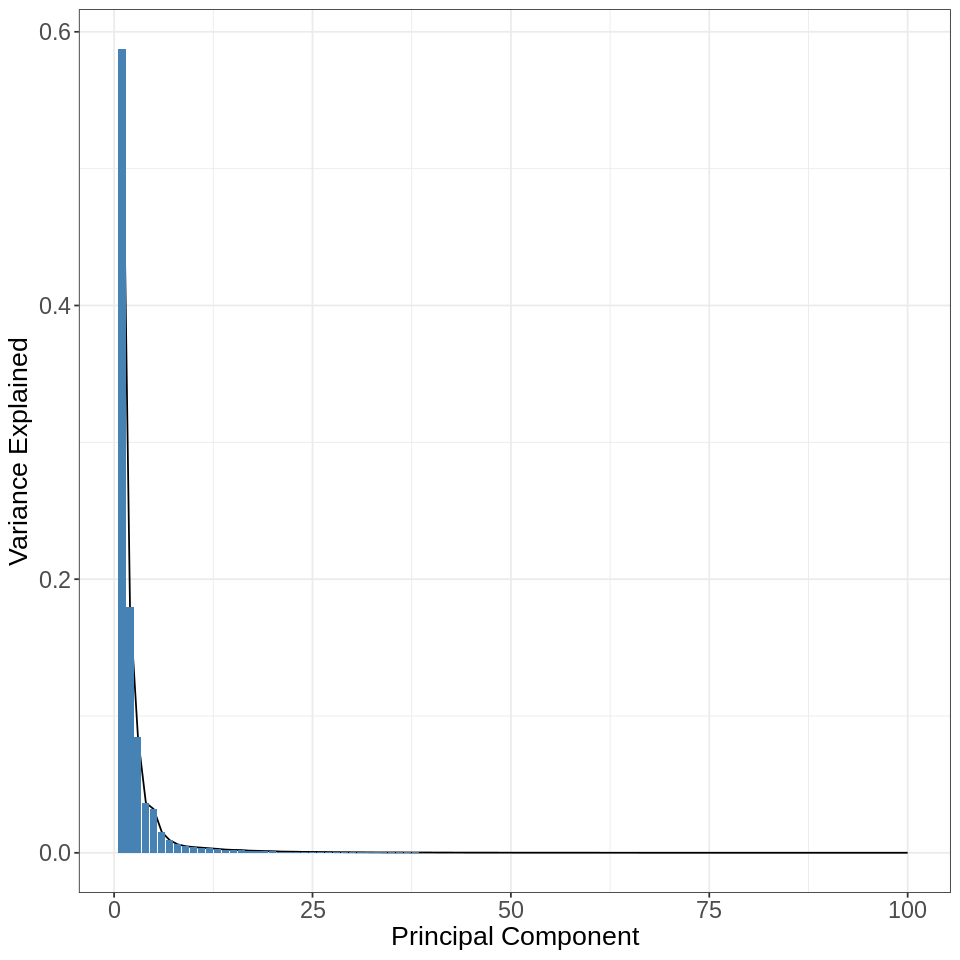

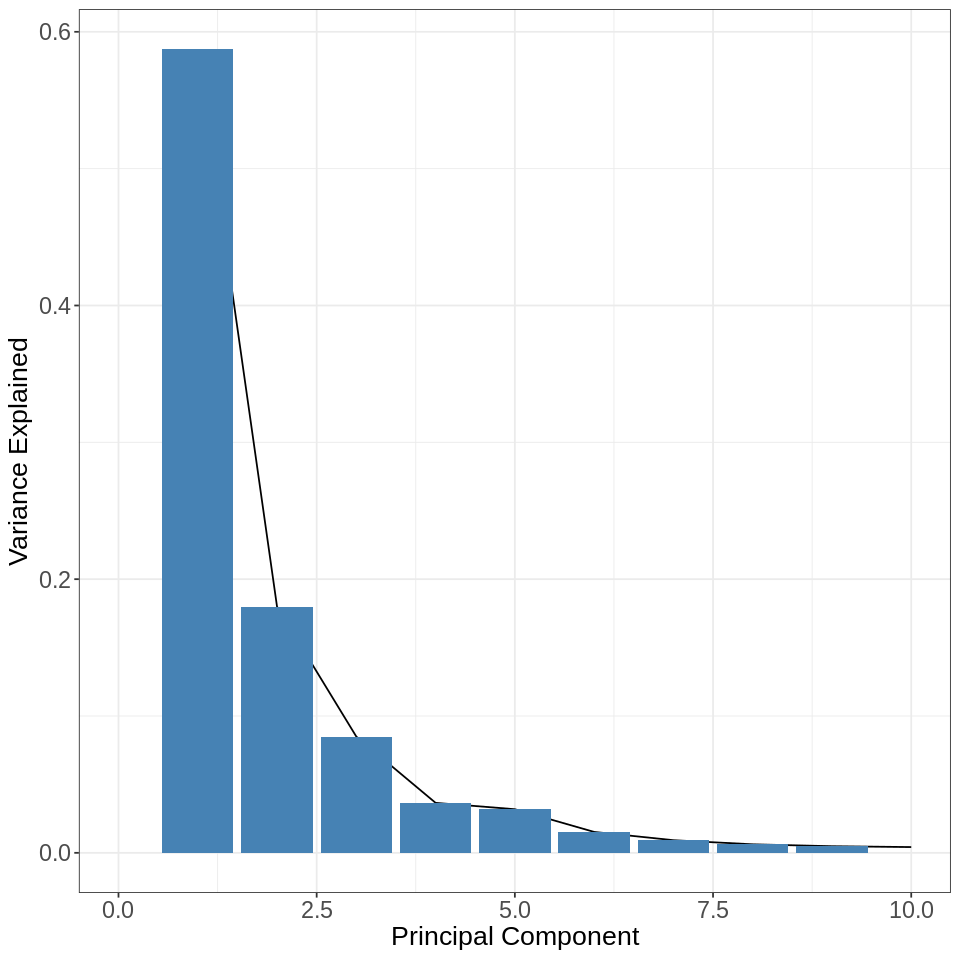

In [16]:
scree_plot
scree_plot_zoom

## UMAP Visualization

png 
  2

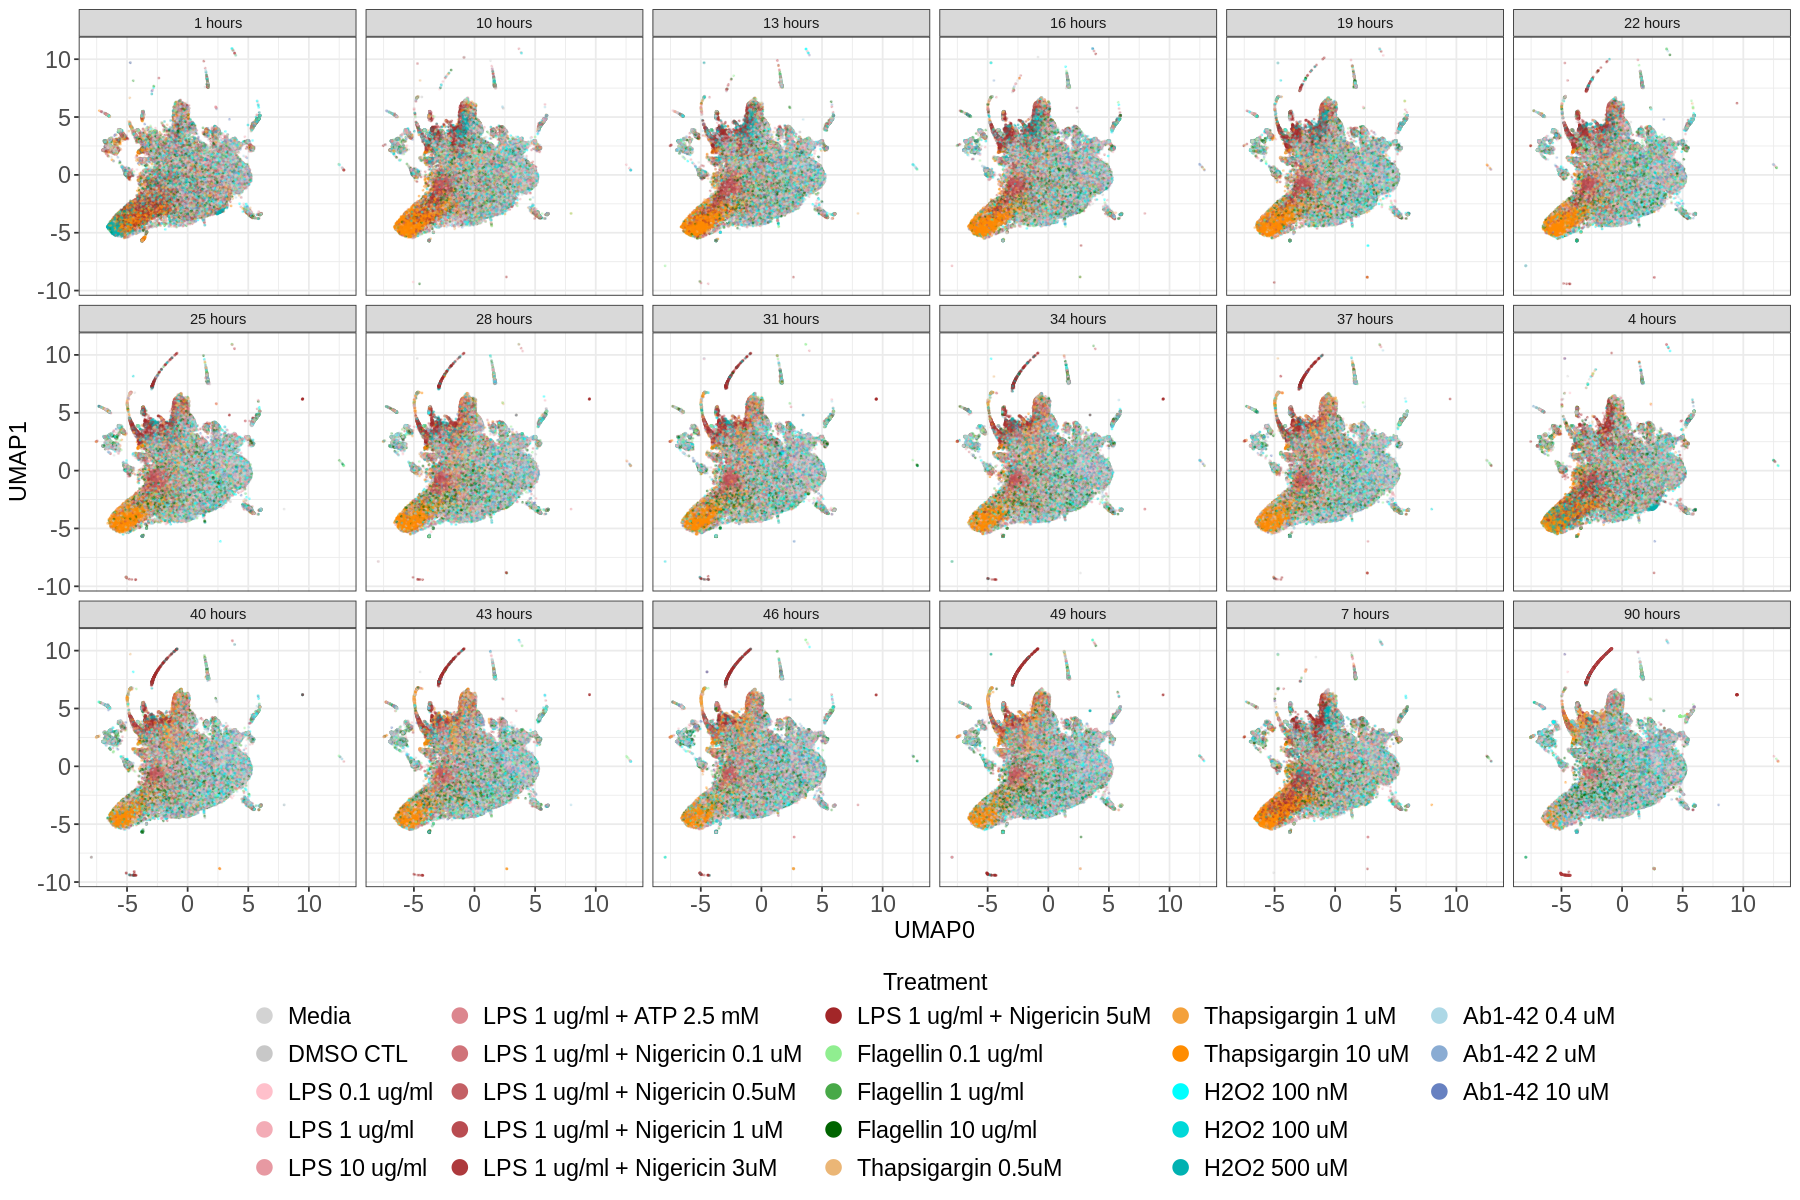

In [17]:
# plot the data
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

umap_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_treatment), size=0.2, alpha=0.3)
    + scale_color_manual(
        values = colors
    )
    # move the legend to the bottom
    + guides(
        color = guide_legend(ncol = 5, title = "Treatment", override.aes = list(size = 4, alpha = 1)),
        # move guide title to top
        title.position = "top",
    )

    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_timepoint_hours, ncol = 6)
)
png(file.path(figure_path,"umap_plot_facet_time.png"), width=width, height=height, units="in", res=600)
umap_plot
dev.off()
umap_plot

In [18]:
# make time a float
umap_data$Metadata_Time <- as.numeric(as.character(umap_data$Metadata_Time))

png 
  2

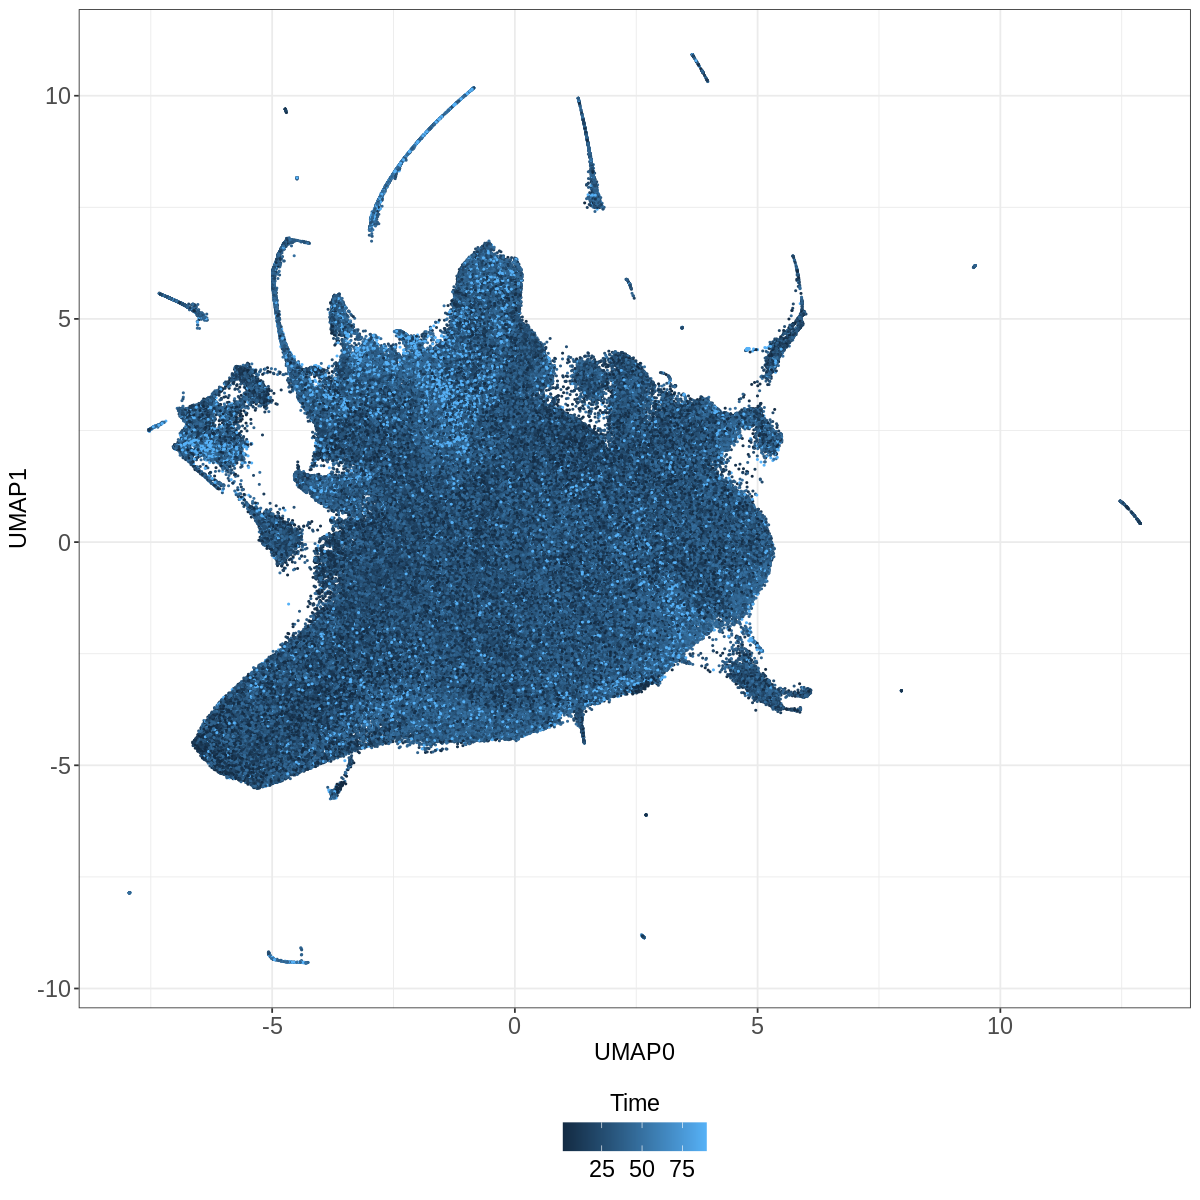

In [19]:
height <- 10
width <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_all_time_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_all_time_plot_col_by_treatment.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot
dev.off()
umap_all_time_plot

png 
  2

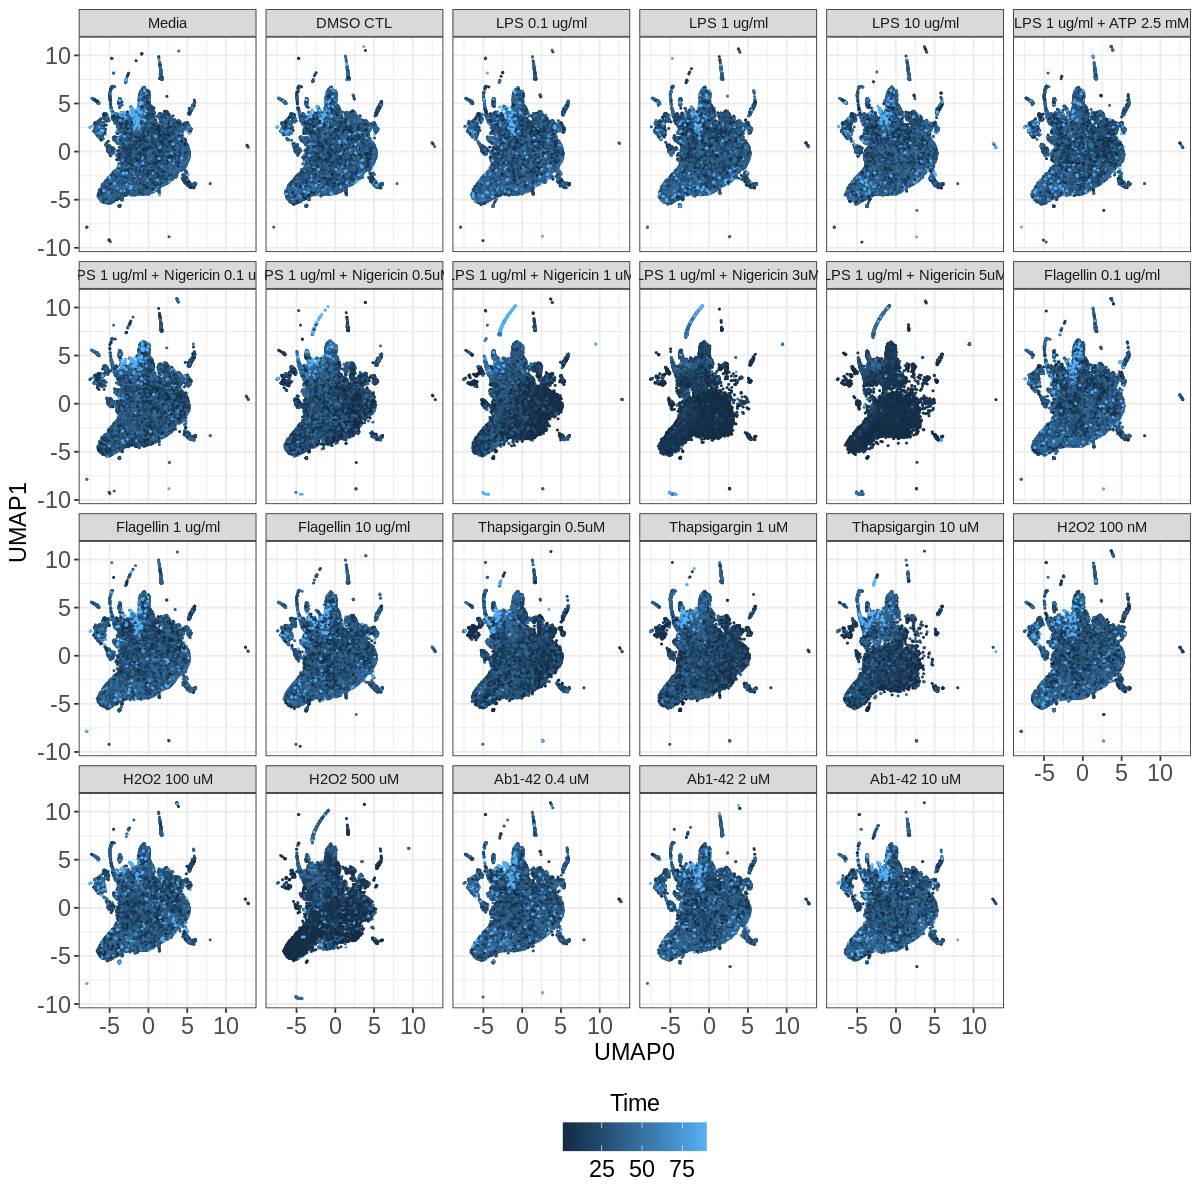

In [20]:
umap_all_time_plot_facet <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment, ncol = 6)
)
png(file.path(figure_path,"umap_all_time_plot_facet.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot_facet
dev.off()
umap_all_time_plot_facet

## Serum viz

png 
  2

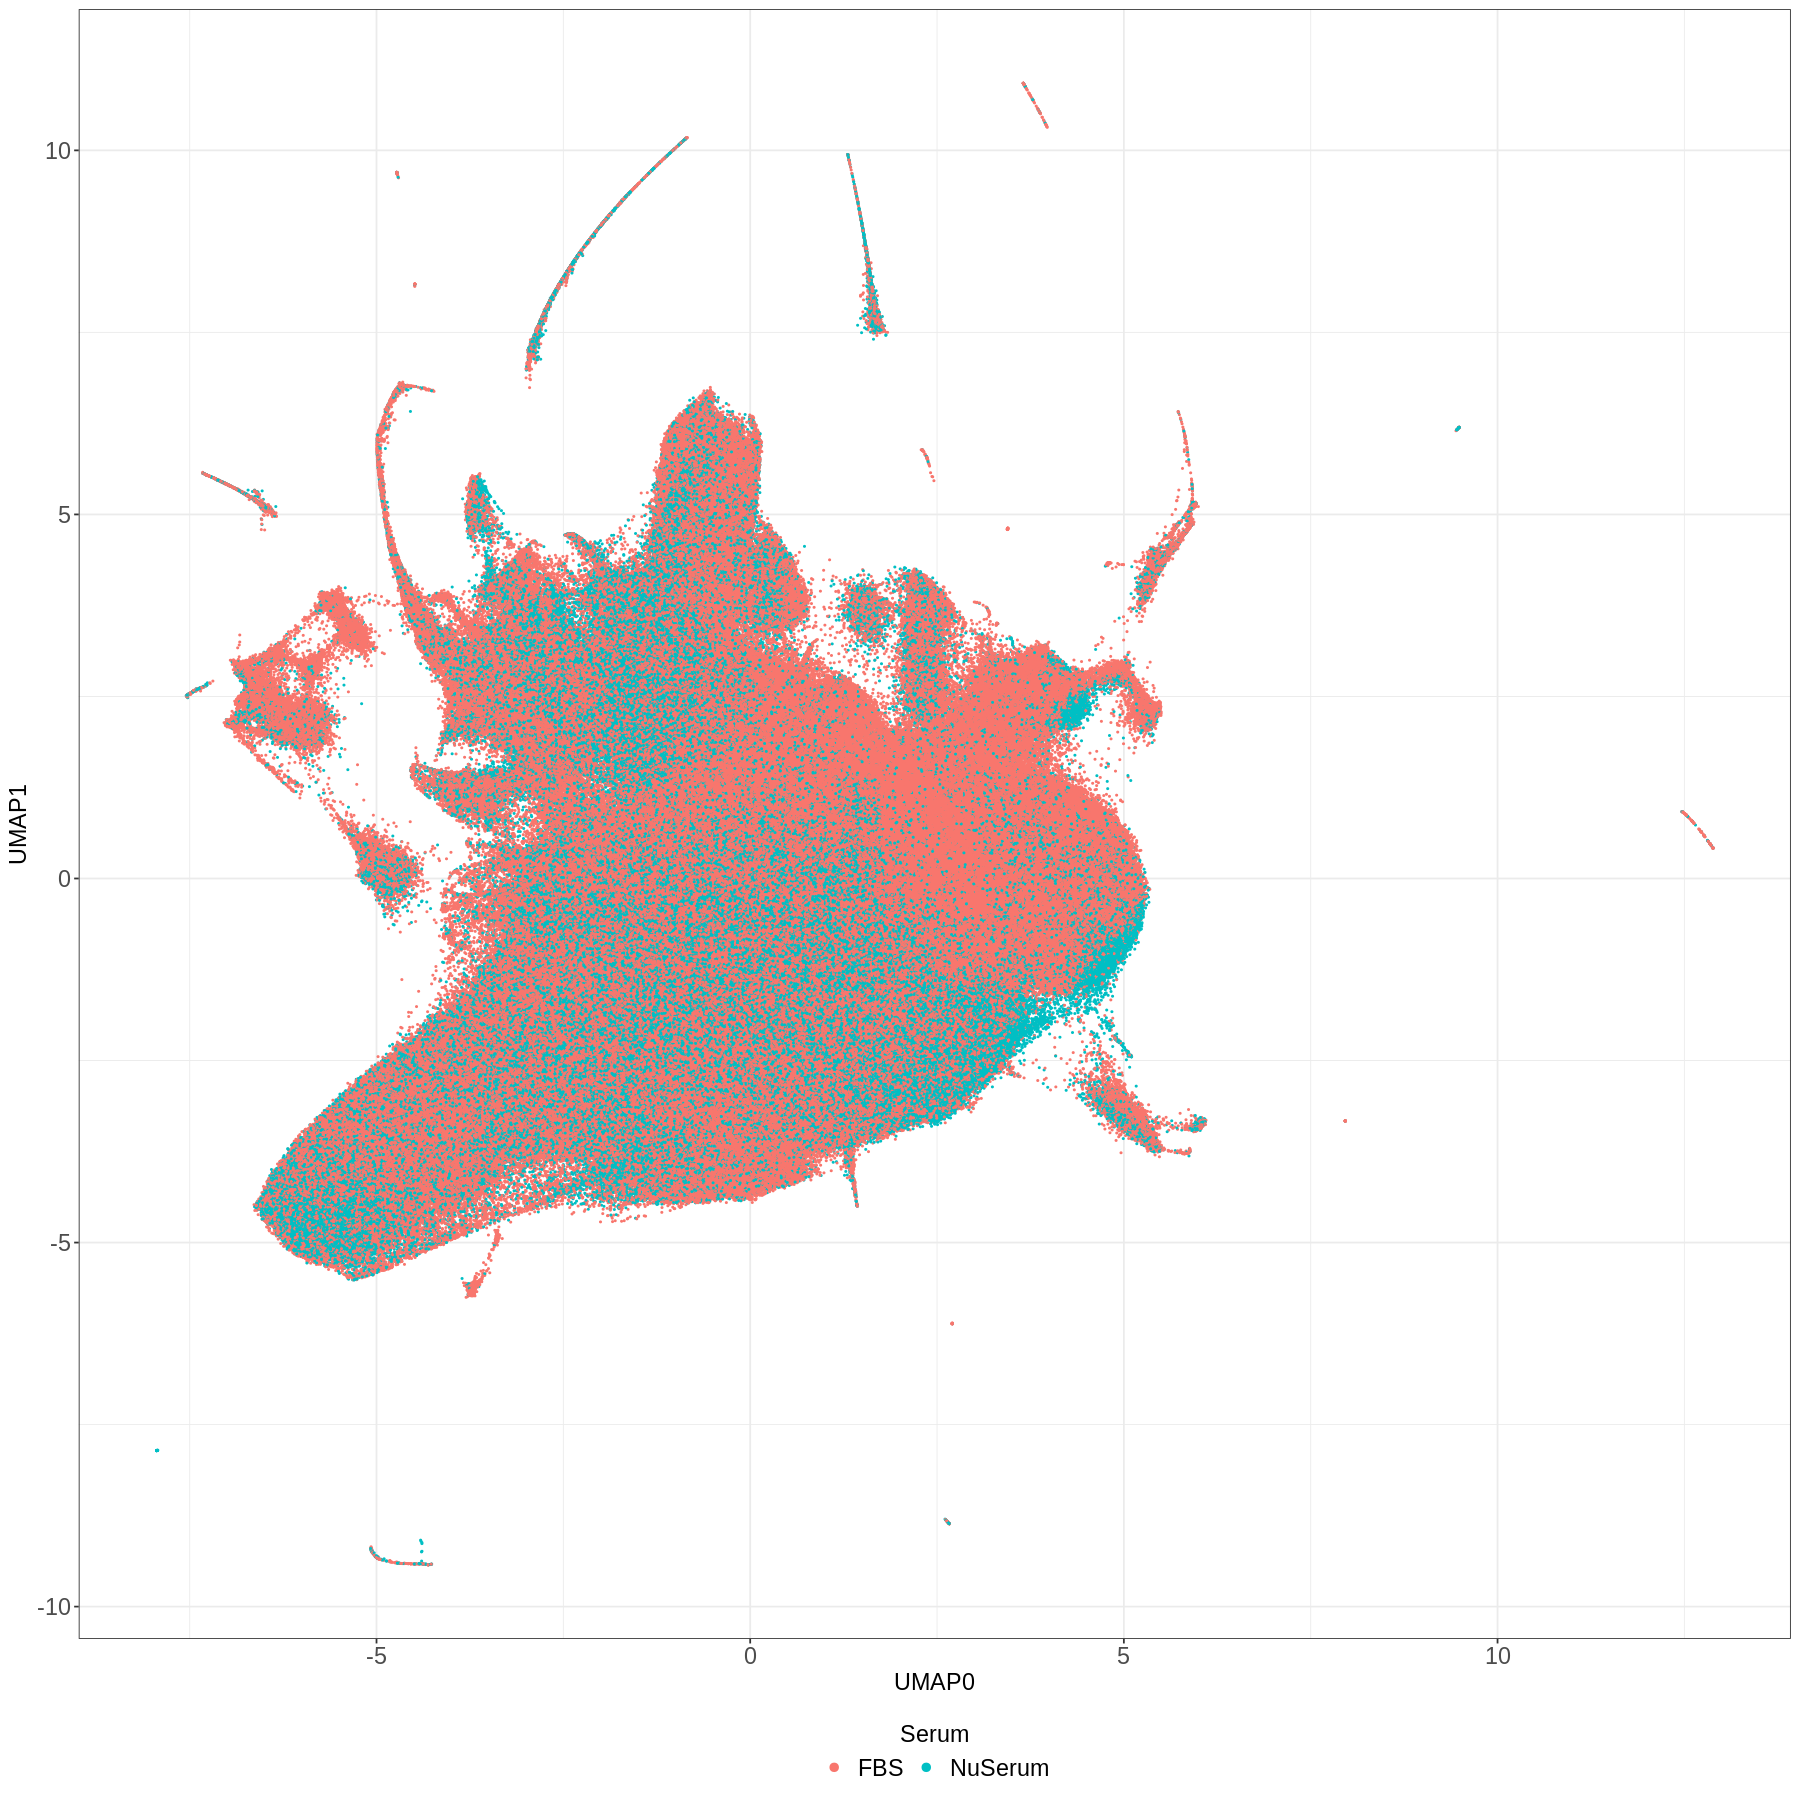

In [21]:
width <- 15
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
umap_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.2)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_serum_plot
dev.off()
umap_serum_plot

png 
  2

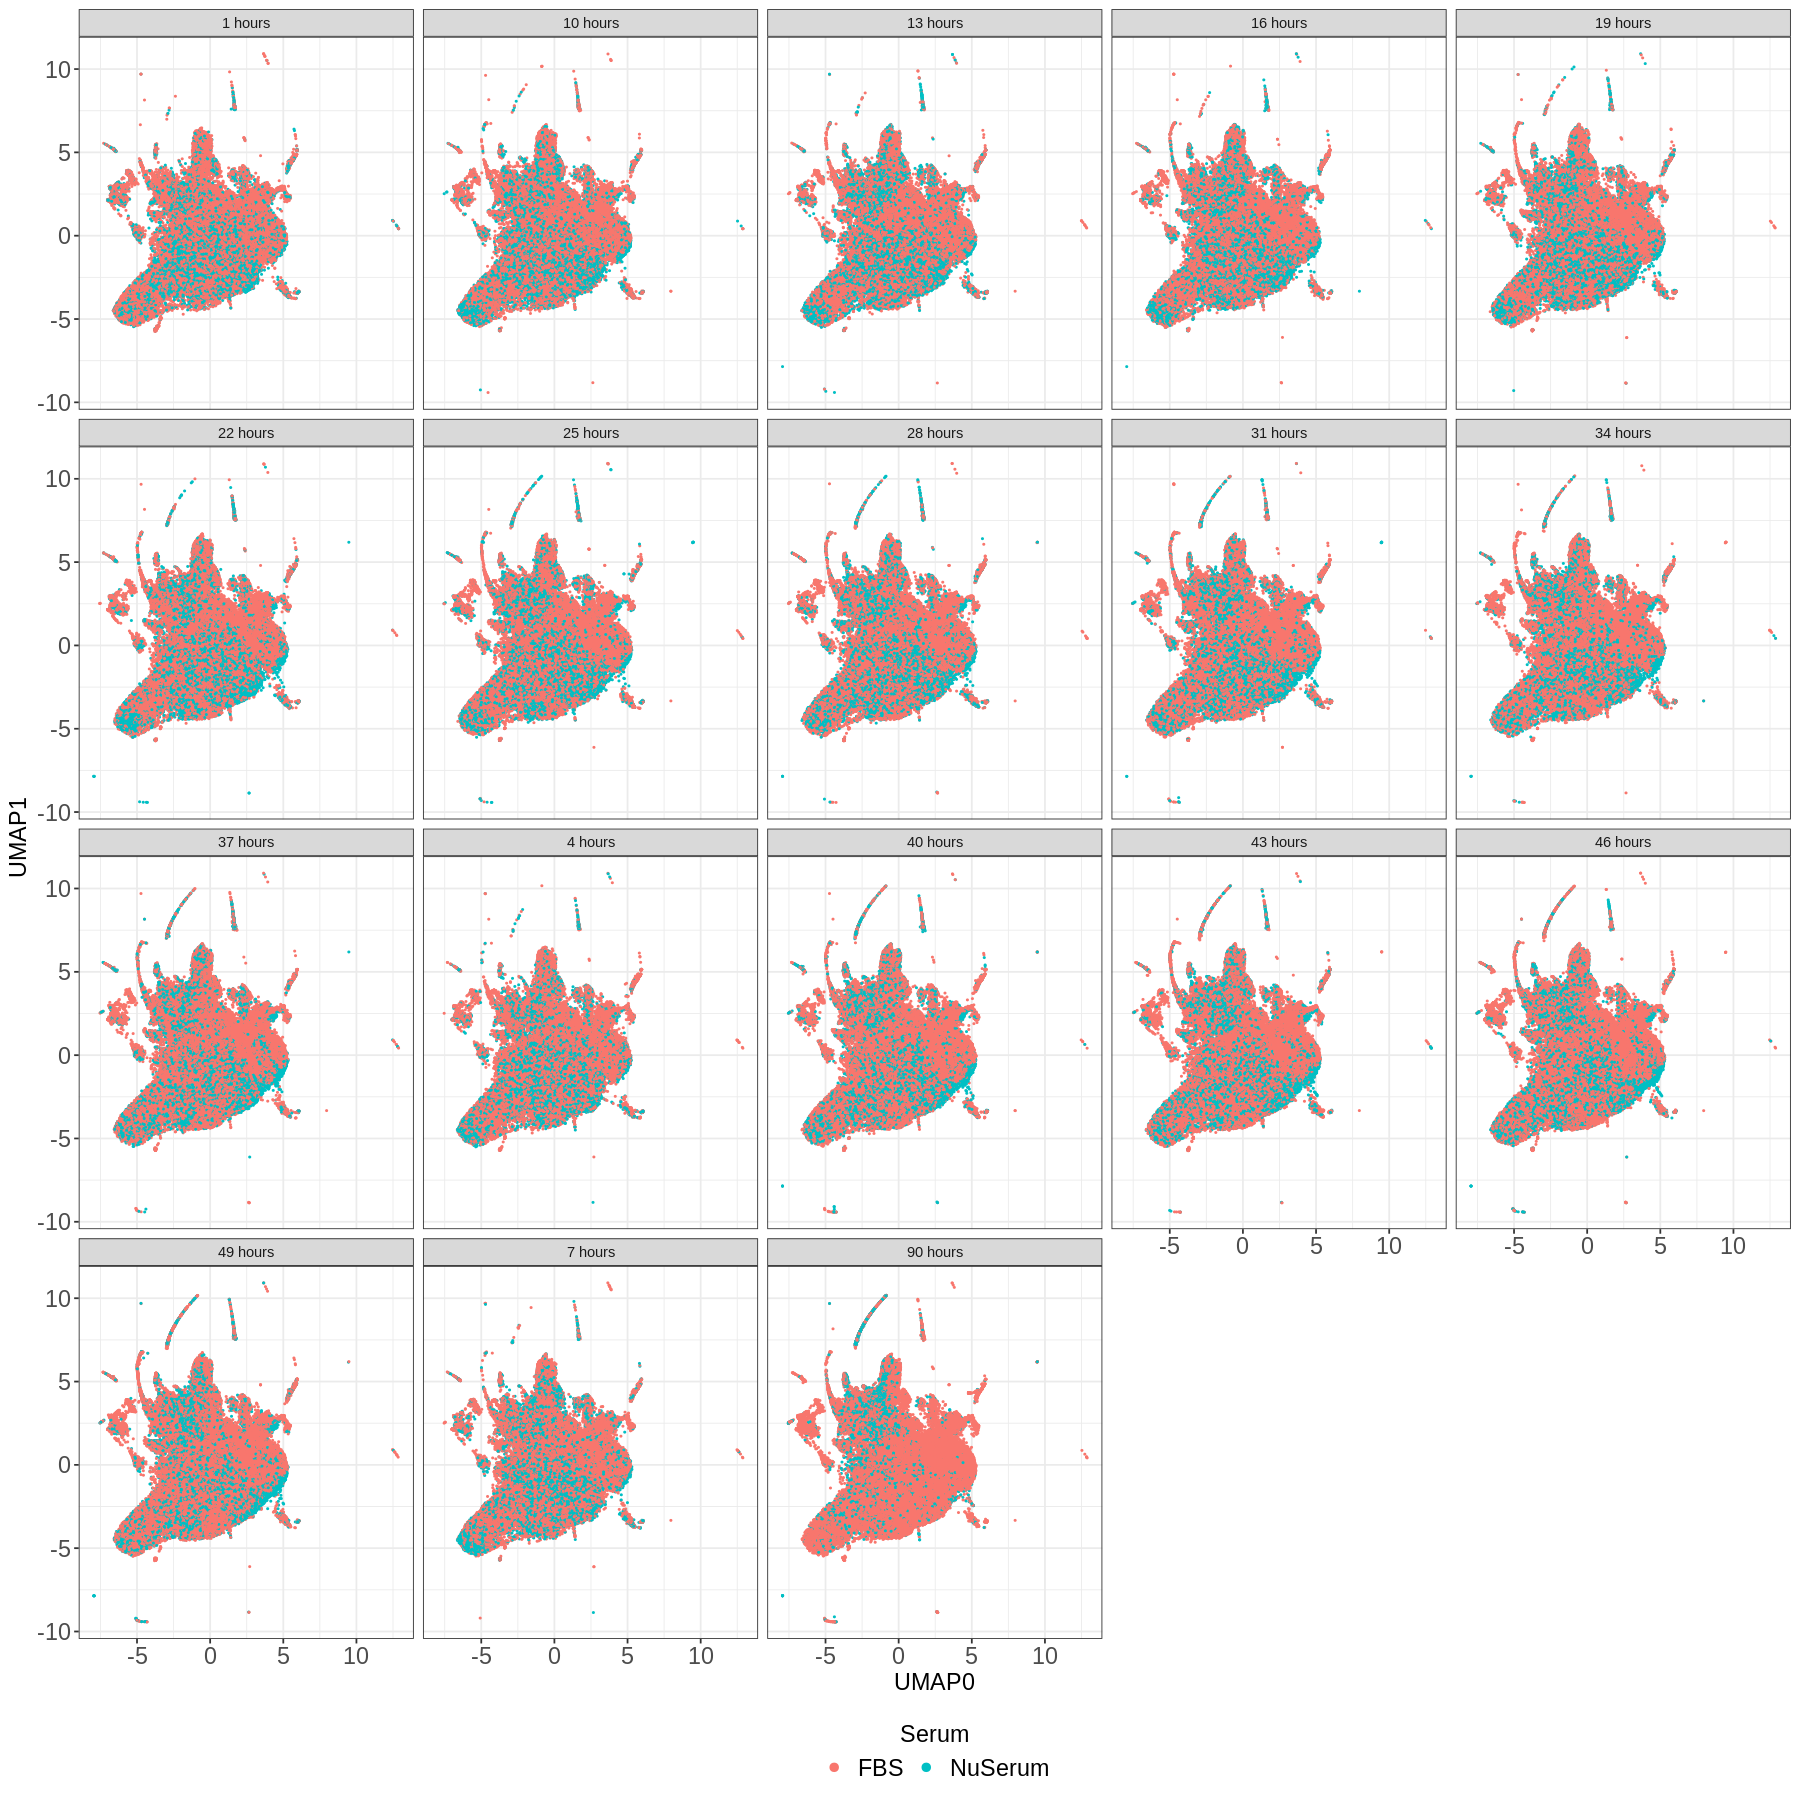

In [22]:
umap_over_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.2)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_timepoint_hours)
)
png(file.path(figure_path,"umap_over_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_over_time_serum_plot
dev.off()
umap_over_time_serum_plot

png 
  2

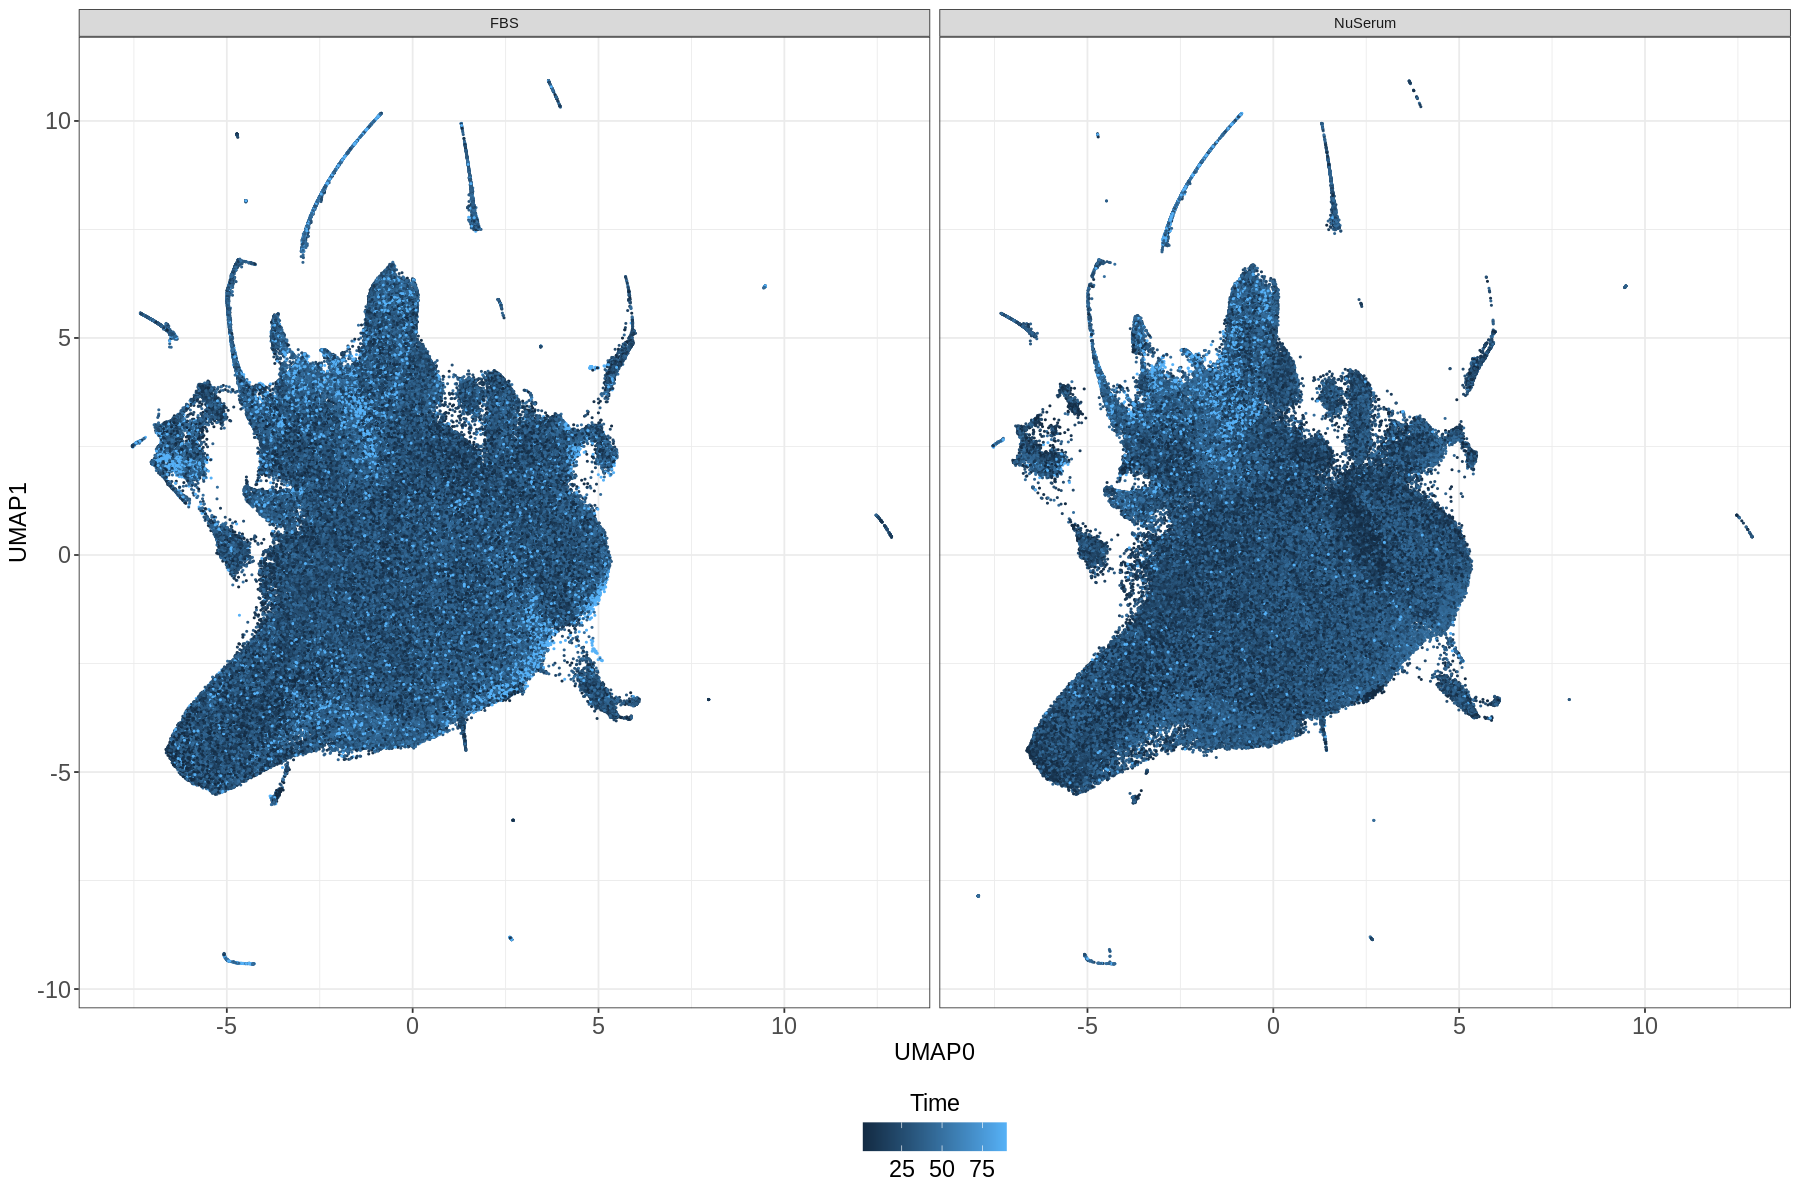

In [23]:
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_serum)
)
png(file.path(figure_path,"umap_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_time_serum_plot
dev.off()
umap_time_serum_plot

In [24]:
head(umap_data)

Metadata_treatment           Metadata_Well Metadata_number_of_singlecells
1 H2O2 100 uM                  L04           389                           
2 Flagellin 1 ug/ml            I06           452                           
3 Flagellin 0.1 ug/ml          J10           782                           
4 LPS 1 ug/ml + Nigericin 1 uM I11           422                           
5 H2O2 100 nM                  M08           422                           
6 Ab1-42 10 uM                 L11           825                           
  Metadata_FOV Metadata_treatment1 Metadata_Time Metadata_treatment2
1 0002         H2O2                15            NA                 
2 0004         Flagellin            2            NA                 
3 0001         Flagellin            6            NA                 
4 0002         LPS                  3            Nigericin          
5 0001         H2O2                 2            NA                 
6 0001         Ab1-42              11            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 100                      uM                       NA                       ⋯
2 1                        ug/ml                    NA                       ⋯
3 0.1                      ug/ml                    NA                       ⋯
4 1                        ug/ml                    1                        ⋯
5 100                      nM                       NA                       ⋯
6 10                       uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0268_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0198_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0226_F0001
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0203_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0296_F0001
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0275_F0001
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0268_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0198_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0226_F0001
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0203_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0296_F0001
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0275_F0001
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0268_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0198_F0004
3 /gpfs/alpine1/scra

In [25]:
# order the df by time 
umap_data <- umap_data %>% arrange(Metadata_Time)
head(umap_data)

Metadata_treatment             Metadata_Well Metadata_number_of_singlecells
1 LPS 1 ug/ml + Nigericin 0.1 uM K11           515                           
2 LPS 1 ug/ml                    E06           410                           
3 LPS 1 ug/ml + Nigericin 5uM    G11           648                           
4 Flagellin 1 ug/ml              I08           347                           
5 H2O2 500 uM                    K06           467                           
6 Ab1-42 10 uM                   L07           425                           
  Metadata_FOV Metadata_treatment1 Metadata_Time Metadata_treatment2
1 0001         LPS                 0             Nigericin          
2 0004         LPS                 0             NA                 
3 0002         LPS                 0             Nigericin          
4 0005         Flagellin           0             NA                 
5 0003         H2O2                0             NA                 
6 0002         Ab1-42              0             NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 1                        ug/ml                    0.1                      ⋯
2 1                        ug/ml                    NA                       ⋯
3 1                        ug/ml                    5uM                      ⋯
4 1                        ug/ml                    NA                       ⋯
5 500                      uM                       NA                       ⋯
6 10                       uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0251_F0001
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0102_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0155_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0200_F0005
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0246_F0003
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0271_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0251_F0001
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0102_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0155_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0200_F0005
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0246_F0003
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0271_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0251_F0001
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0102_F0004
3 /gpf

In [26]:
name_repair_function <- function(names) {
  names[1] <- paste0(names[1], "_original")
  return(names)
}
df_background <- tidyr::crossing(
    umap_data,
    Metadata_treatment = unique(umap_data$Metadata_treatment),
    .name_repair = name_repair_function
)
head(df_background)

Metadata_treatment_original Metadata_Well Metadata_number_of_singlecells
1 Media                       C04           306                           
2 Media                       C04           306                           
3 Media                       C04           306                           
4 Media                       C04           306                           
5 Media                       C04           306                           
6 Media                       C04           306                           
  Metadata_FOV Metadata_treatment1 Metadata_Time Metadata_treatment2
1 0004         Media               3             NA                 
2 0004         Media               3             NA                 
3 0004         Media               3             NA                 
4 0004         Media               3             NA                 
5 0004         Media               3             NA                 
6 0004         Media               3             NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 NA                       NA                       NA                       ⋯
2 NA                       NA                       NA                       ⋯
3 NA                       NA                       NA                       ⋯
4 NA                       NA                       NA                       ⋯
5 NA                       NA                       NA                       ⋯
6 NA                       NA                       NA                       ⋯
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0052_F0004
  Metadata_Nuclei_Location_Center_X Metadata_Nuclei_Location_Center_Y
1 185.8961                          26.96111                         
2 185.8961                          26.96111                         
3 185.8961                          26.96111                         
4 185.8961                          26.96111                         
5 185.8961                          26.96111                         
6 185.8961                       

In [27]:
# get the centroids of each treatment, at each timepoint 
centroids <- umap_data %>% 
  group_by(Metadata_treatment, Metadata_timepoint) %>% 
  summarize(
    UMAP0 = mean(UMAP0),
    UMAP1 = mean(UMAP1)
  ) %>% 
  ungroup()
head(centroids)


`summarise()` has grouped output by 'Metadata_treatment'. You can override
using the `.groups` argument.


Metadata_treatment Metadata_timepoint UMAP0     UMAP1      
1 Media               1                 0.8751988  0.07077197
2 Media               4                 0.9858437 -0.05673286
3 Media               7                 0.9969164 -0.07727592
4 Media              10                 0.8574378 -0.14023539
5 Media              13                 0.9008347 -0.14660313
6 Media              16                 0.9190452 -0.25623230

: 

In [ ]:

# plot the centroids over time
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
centroids_umap_plot <- (
    # plot the whole dataset in grey with low alpha
    ggplot(centroids, aes(x=UMAP0, y=UMAP1))
    + geom_point(
        data = df_background,
        color = "lightgrey",
        size = 0.5,
        alpha = 0.1
    )
    + geom_point(aes(color=Metadata_treatment), size=1.5, alpha=0.9)

    + scale_color_manual(
        values = colors
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    # + facet_wrap(~Metadata_treatment, ncol = 6)
    + transition_time(Metadata_timepoint)
    + labs(title = "Time: {frame_time}")
)

n_timepoints <- length(unique(centroids$Metadata_timepoint))
fps <- 15

nframes <- n_timepoints * fps
anim_save("pyroptosis_timelapsed_centroids.gif", animate(centroids_umap_plot,fps = fps, nframes = nframes))

In [29]:

# plot the centroids over time
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
centroids_umap_plot <- (
    # plot the whole dataset in grey with low alpha
    ggplot(centroids, aes(x=UMAP0, y=UMAP1))
    + geom_point(
        data = df_background,
        color = "lightgrey",
        size = 0.5,
        alpha = 0.1
    )
    + geom_point(aes(color=Metadata_treatment), size=1.5, alpha=0.9)

    + scale_color_manual(
        values = colors
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment, ncol = 6)
    + transition_time(Metadata_timepoint)
    + labs(title = "Time: {frame_time}")
)

n_timepoints <- length(unique(centroids$Metadata_timepoint))
fps <- 15

nframes <- n_timepoints * fps
anim_save("pyroptosis_timelapsed_centroids_facet_by_treatment.gif", animate(centroids_umap_plot,fps = fps, nframes = nframes))